In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

import librosa
import librosa.display
from scipy import signal

In [3]:
# Utils
def load_audio(f_name, sr=sr, offset=0, duration=None):
    x = librosa.load(f_name, sr=sr, offset=offset, duration=duration)[0]
    audio = ipd.Audio(x, rate=sr)
    ipd.display(audio)
    return x

def plot_amp(x, fs, sample_num=None):
    plt.figure(figsize=(10, 5))
    n = np.arange(x.shape[0] if sample_num==None else sample_num)
    plt.plot(n/fs, x if sample_num==None else x[:sample_num])
    plt.grid(True)
    plt.xlabel('Second')
    plt.ylabel('Amplitude')

def plot_amp_phs(w, h):
    plt.figure(figsize=(10, 5))

    fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,10))

    ax[0].plot(w, np.abs(h))
    ax[0].grid(True)
    ax[0].set_title('Amplitude Response')
    ax[0].set_xlabel('Frequency [rad/sample]')

    ax[1].plot(w, np.angle(h))
    ax[1].grid(True)
    ax[1].set_title('Phase Response')
    ax[1].set_xlabel('Frequency [rad/sample]')
    
def plot_freq_magnitude(x_fft, freq_range):
    plt.figure(figsize=(10, 5))
    
    x_mag = np.abs(x_fft)
    x_db = 20 * np.log10(x_mag/max(x_mag))
    plt.plot(freq_range, x_db)
    plt.grid(True)
    plt.title('dB Scale')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Decibel(dB)')

## Problem #1: Convolution
### Q2

In [111]:
def my_conv(x,h):
    # x = input signal
    # h = impulse response
    # y = output signal

    ### Your Implementation of convolution ###
    x_size = x.shape[0]
    ker_size = h.shape[0]
    conv_size = x_size - ker_size + 1
    
    reversed_h = np.flip(h)
    y = np.zeros(conv_size + (2 * (ker_size - 1)))
    y_idx = 0
    
    # Left Transient State
    for i in range(1, ker_size):
        y[y_idx] = np.dot(x[:i], np.flip(h[:i]))
        y_idx += 1
    
    # Steady State
    for i in range(0, conv_size):
        y[y_idx] = np.dot(x[i:i+ker_size], reversed_h)
        y_idx += 1
    
    # Right Transient State
    for i in range(1, ker_size):
        y[y_idx] = np.dot(x[conv_size+i-1:], np.flip(h)[:ker_size-i])
        y_idx += 1

    return y

In [112]:
x = np.array([1, 2, 3, 2, 5, 6, 7, 8])
h = np.array([3, -1, -2, 4])
my_conv(x, h)

array([ 3.,  5.,  5.,  3., 15., 21., 13., 25.,  2., 12., 32.])

In [113]:
# 정답
np.convolve(x, h)

array([ 3,  5,  5,  3, 15, 21, 13, 25,  2, 12, 32])

### Q3

In [119]:
sr = 44100
audio = load_audio('./Snare.wav', sr=sr)

In [120]:
h1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
sf.write('result_1.wav', my_conv(audio, h1), sr)
# 확인
audio = load_audio('result_1.wav', sr=sr)

In [121]:
h2 = np.array([1, -2, 1])
sf.write('result_2.wav', my_conv(audio, h2), sr)
# 확인
audio = load_audio('result_2.wav', sr=sr)

## Problem #2: FIR Filter

<Figure size 720x360 with 0 Axes>

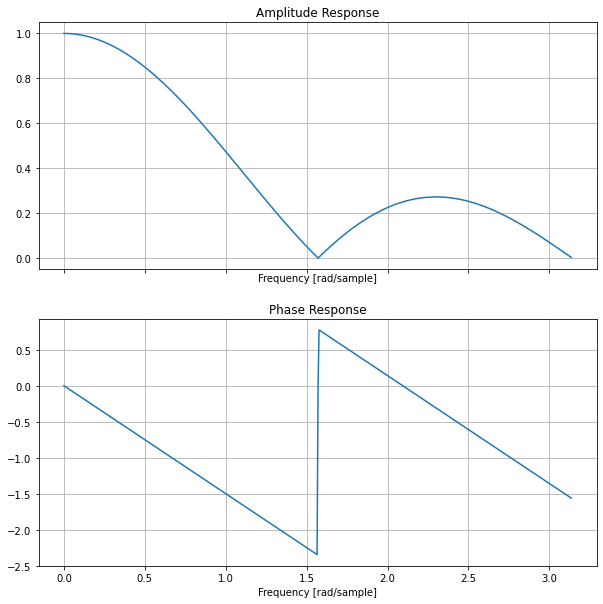

In [133]:
b = [0.25, 0.25, 0.25, 0.25]
w, h = signal.freqz(b)
plot_amp_phs(w, h)

## Problem #3: IIR Filter

<Figure size 720x360 with 0 Axes>

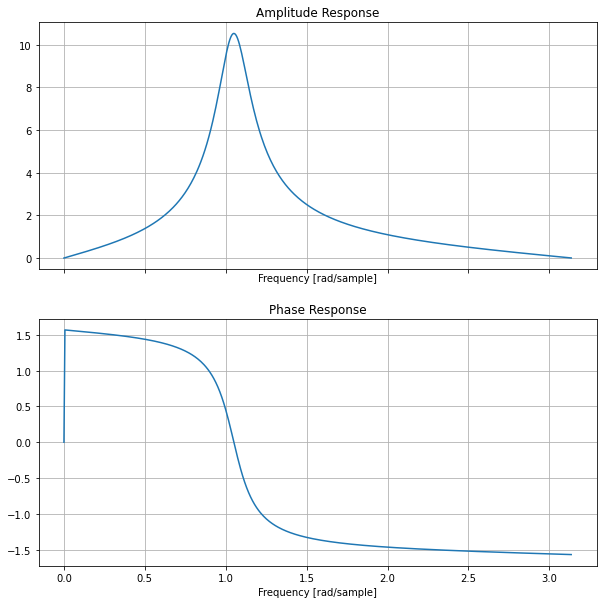

In [138]:
b = [1, 0, -1]
a = [1, -0.9, 0.81]
w, h = signal.freqz(b=b, a=a)
plot_amp_phs(w, h)

## Problem #4: Wind Sound Design

### Q1

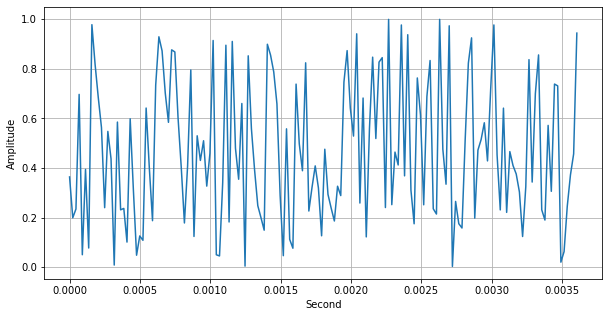

In [5]:
sr = 44100
duration = 2
noise = np.random.rand(sr*duration)
plot_amp(noise, sr, sample_num=160)

audio = ipd.Audio(noise, rate=sr)
ipd.display(audio)

### Q2

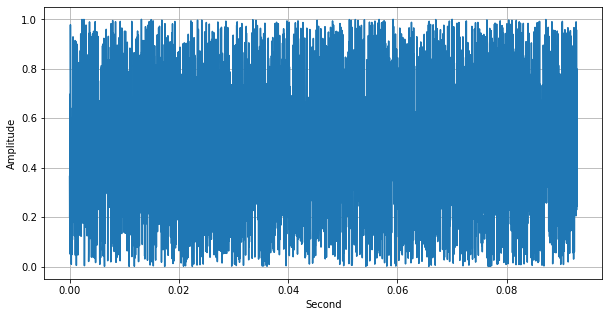

In [6]:
window_size = 4096
fft_size = 4096

segment = noise[:window_size]
plot_amp(segment, sr)

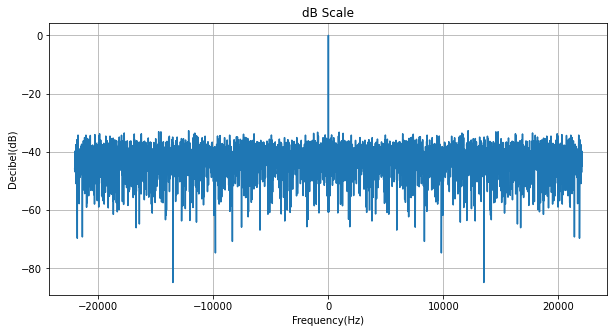

In [7]:
x_fft = np.fft.fft(segment)
x_fft = np.fft.fftshift(x_fft, axes=0)

# Scaling factor for x-axis
freq_range = np.arange(-(fft_size/2), (fft_size/2))*sr/fft_size
plot_freq_magnitude(x_fft, freq_range)

### Q3 & Q4

<Figure size 720x360 with 0 Axes>

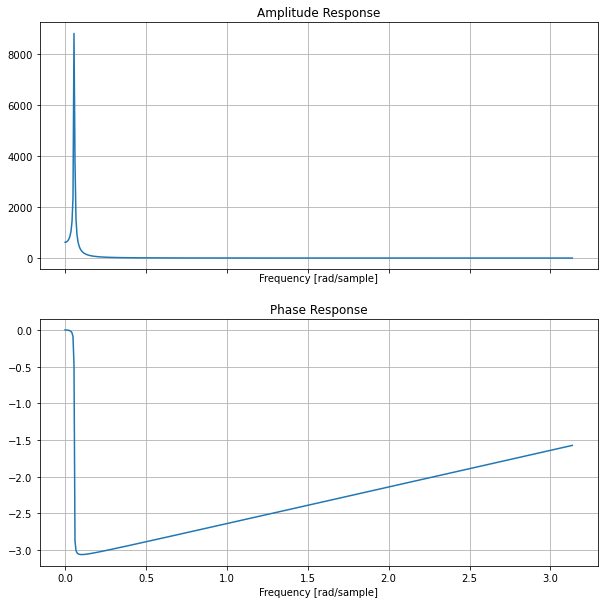

In [11]:
b = [1, 1]
r = 0.999
fc = 400
sr = 44100
theta = 2*np.pi*fc/sr
a = [1, -2*r*np.cos(theta), r*r]

w, h = signal.freqz(b=b, a=a)
plot_amp_phs(w, h)

y = signal.lfilter(b, a, noise)
ipd.Audio(y, rate=sr)

### Q5

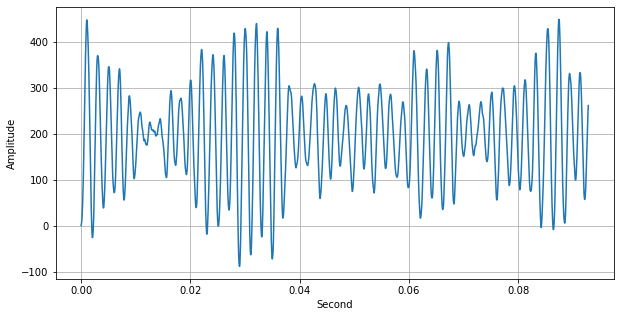

In [189]:
window_size = 4096
fft_size = 4096

segment = y[:window_size]
plot_amp(segment, sr)

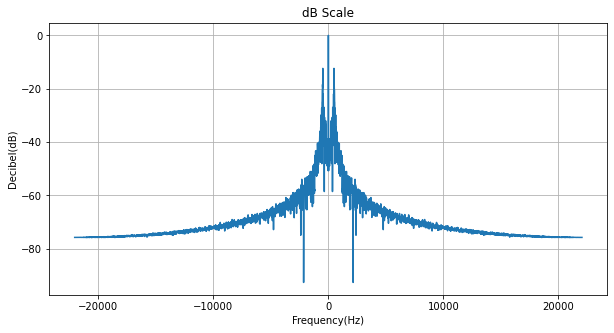

In [190]:
x_fft = np.fft.fft(segment)
x_fft = np.fft.fftshift(x_fft, axes=0)

# Scaling factor for x-axis
freq_range = np.arange(-(fft_size/2), (fft_size/2))*sr/fft_size
plot_freq_magnitude(x_fft, freq_range)